In [ ]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')


In [ ]:
import yfinance as yf

df = yf.download('AAPL', start='2015-01-01', end='2023-05-19')

# Show data
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.531759   
2015-01-05   27.072500   27.162500   26.352501   26.562500   23.840666   
2015-01-06   26.635000   26.857500   26.157499   26.565001   23.842911   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.177238   
2015-01-08   27.307501   28.037500   27.174999   27.972500   25.106186   
...                ...         ...         ...         ...         ...   
2023-05-12  173.619995  174.059998  171.000000  172.570007  172.570007   
2023-05-15  173.160004  173.210007  171.470001  172.070007  172.070007   
2023-05-16  171.990005  173.139999  171.800003  172.070007  172.070007   
2023-05-17  171.710007  172.929993  170.419998  172.690002  172.690002   
2023-05-18  173.000000  175.240005  172.580

In [ ]:
#Get the number of rows and columns in  the data set
df.shape

(2109, 6)

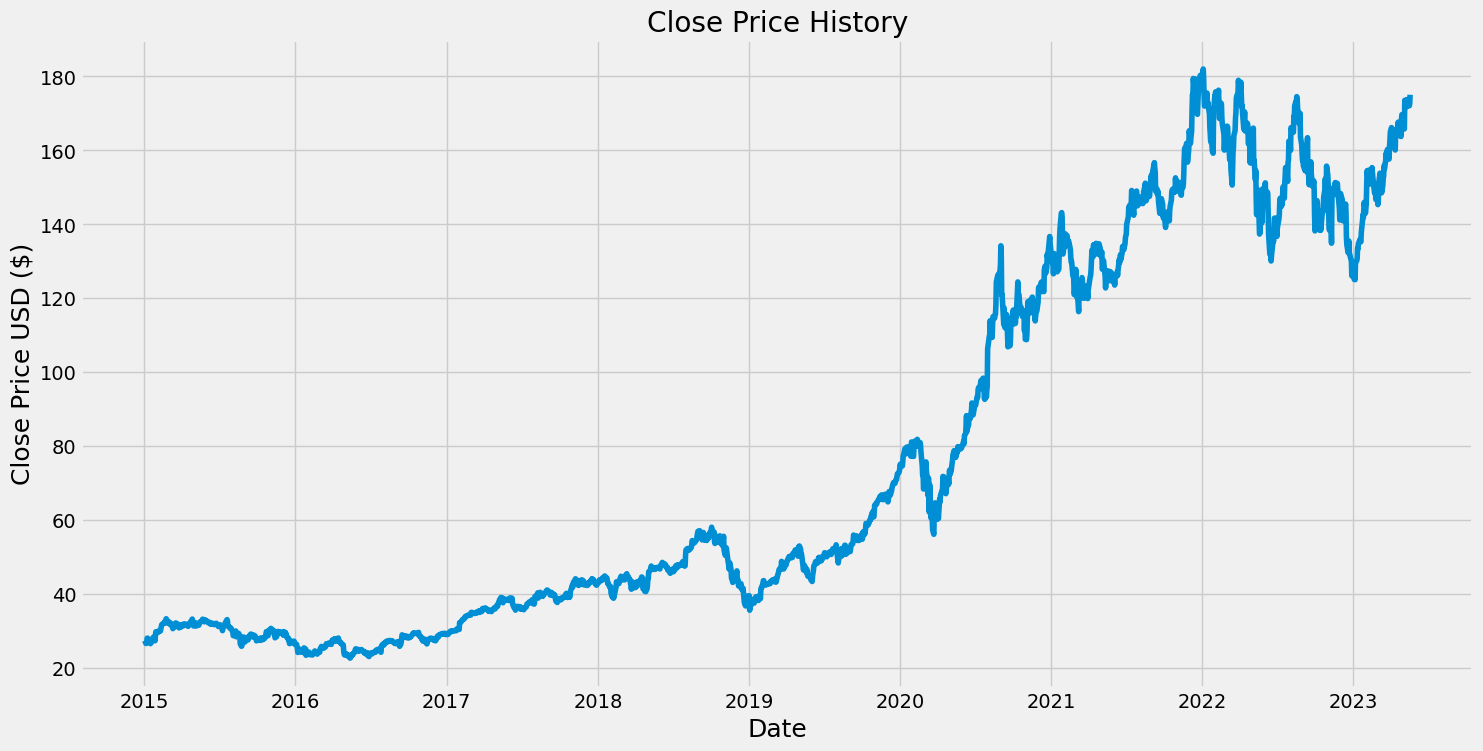

In [ ]:
#Visualize the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only 'Close' column
data = df.filter(['Close'])

#Convert the dataframe to numpy array
dataset= data.values

#Get number of rows to train model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len


1688

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.93765101],
       [0.94153996],
       [0.95634316]])

In [ ]:
#Create the training dataset
#Create the scaled training dataset
train_data= scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train datasets
x_train = []
y_train = []


for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03012389, 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915635, 0.04478596, 0.04205741,
       0.04436256, 0.04439393, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976165, 0.06140819, 0.06689667,
       0.06559511, 0.06029481, 0.06285087, 0.05977734, 0.06076525,
       0.06118866, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002353, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979302, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.0531598 , 0.05160735, 0.05649993])]
[0.053457746504823156]



In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1628, 60, 1)

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1628/1628 [==============================] - 32s 18ms/step - loss: 0.0013


In [ ]:
#Create the testing set
#Create a new array containing scaled values from index 1628 to 2109
test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 10ms/step


In [ ]:
#Get the root mean squared error (RMSE) 
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

5.254300930720893

<ipython-input-18-2a21135b693f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


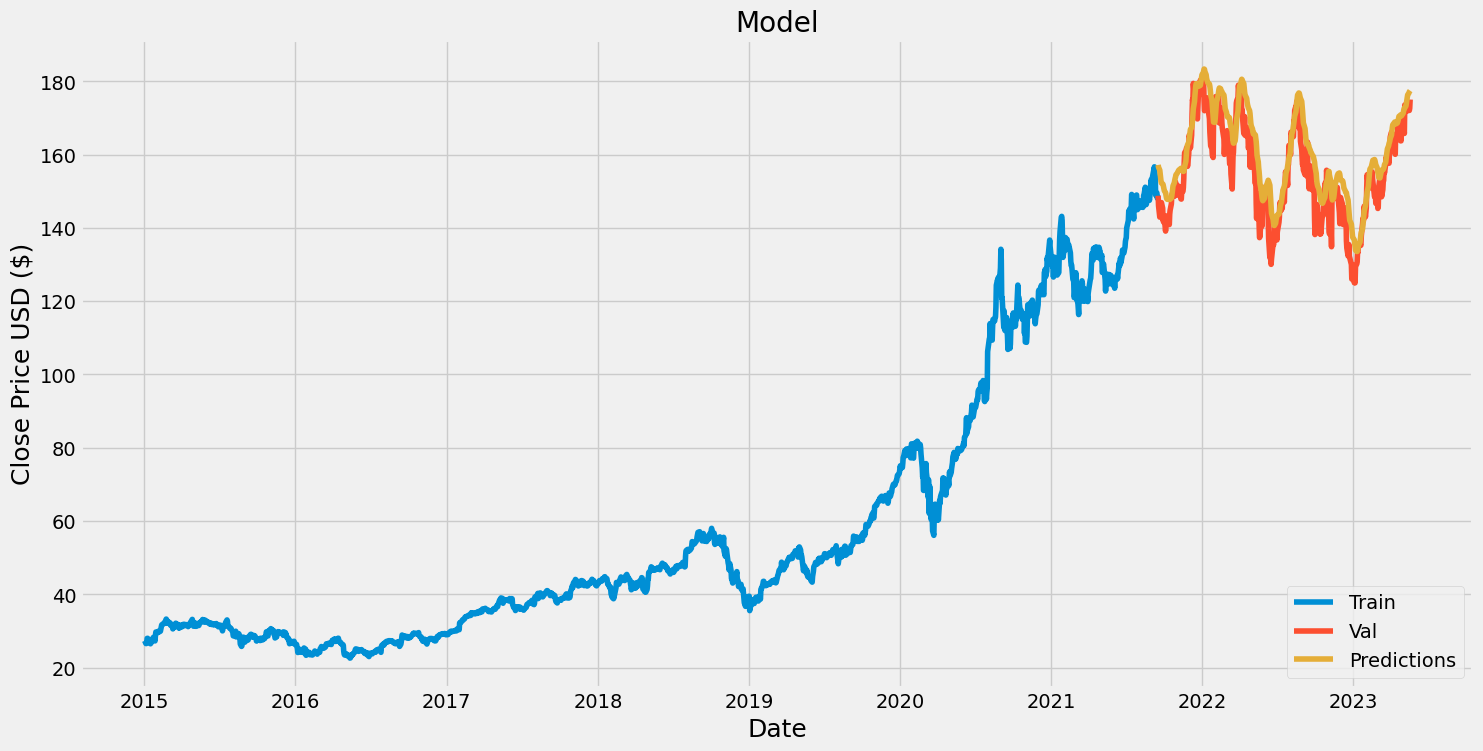

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-16,148.789993,157.198746
2021-09-17,146.059998,156.567474
2021-09-20,142.940002,155.763245
2021-09-21,143.429993,154.651962
2021-09-22,145.850006,153.527054
...,...,...
2023-05-12,172.570007,176.308258
2023-05-15,172.070007,176.828690
2023-05-16,172.070007,177.148666


In [ ]:
#Get the quote
apple_quote = yf.download('AAPL', start='2015-01-01', end='2023-05-19')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 22ms/step
[[177.80032]]


In [ ]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2023-05-18', end='2023-05-19')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-05-18    175.050003
Name: Close, dtype: float64
